In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import r2_score
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Surpress globally the use of exponential numbers
pd.options.display.float_format = '{:.2f}'.format

# #feature_importance.round(3) or do it manually with this code

# Y Axis: The Importance of a Feature
How much the feature is used. The normalized total reduction of the criterion brought by that feature (from https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html). 

# US Houses Dataset

13 features, reduction of 0.00%


Text(0.5, 1.0, 'Feature Weights for USA Housing Dataset')

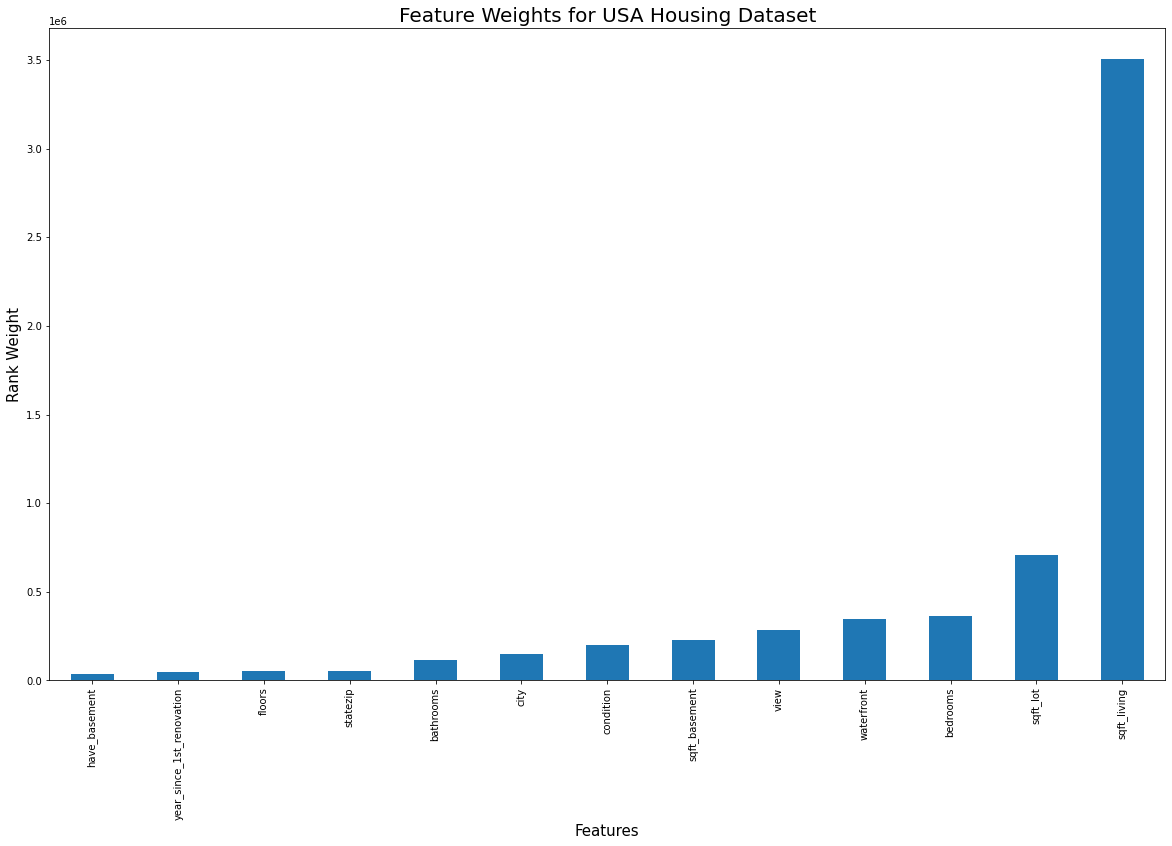

In [3]:
dataset_path_USA = os.path.join('../datasets/USA_houseprices_2014/')
file_name_USA = 'preprocessed_data_USAhouseprices2014.csv'
df_USA = pd.read_csv(dataset_path_USA + file_name_USA)

X_USA = df_USA.drop(['price'], axis = 1)
y_USA = df_USA['price']

from sklearn.linear_model import ElasticNetCV, ElasticNet

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        precompute='auto', max_iter=2500, tol=0.0001, cv=5, copy_X=True, verbose=0, n_jobs=-1, positive=False, 
                        random_state=42, selection='cyclic')

cv_model.fit(X_USA, y_USA)

model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, random_state=42)
model.fit(X_USA, y_USA)

feature_importance_USA = pd.Series(index = X_USA.columns, data = np.abs(model.coef_))

n_selected_features = (feature_importance_USA>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance_USA))*100))

feature_importance_USA.sort_values().tail(30).plot(kind = 'bar', figsize = (20,12))
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Rank Weight', fontsize = 15)
plt.title('Feature Weights for USA Housing Dataset', fontsize = 20)

In [4]:
elastic_net_USA = feature_importance_USA.to_frame()
elastic_net_USA['method'] = 'elastic_net'
elastic_net_USA['dataset'] = 'USA_housing'


elastic_net_USA = elastic_net_USA.reset_index(level = 0)
elastic_net_USA.rename(columns = {0: 'feature_rank', 'index': 'feature_name'}, inplace = True)

#To rank them instead of showing the coefficients
elastic_net_USA['feature_rank'] = elastic_net_USA['feature_rank'].rank(method='min', ascending=False)
elastic_net_USA

,feature_name,feature_rank,method,dataset
0,bedrooms,3.00,elastic_net,USA_housing
1,bathrooms,9.00,elastic_net,USA_housing
2,sqft_living,1.00,elastic_net,USA_housing
3,sqft_lot,2.00,elastic_net,USA_housing
4,floors,11.00,elastic_net,USA_housing
5,waterfront,4.00,elastic_net,USA_housing
6,view,5.00,elastic_net,USA_housing
7,condition,7.00,elastic_net,USA_housing
8,sqft_basement,6.00,elastic_net,USA_housing
9,year_since_1st_renovation,12.00,elastic_net,USA_housing


In [5]:
elastic_net_USA.to_csv('../data/elastic_net/featureranks_USA.csv', sep=';',index=False)

# Austin Housing Dataset
Target Variable is 'latestPrice'

26 features, reduction of 3.70%


Text(0.5, 1.0, 'Feature Weights for Austin Housing Dataset')

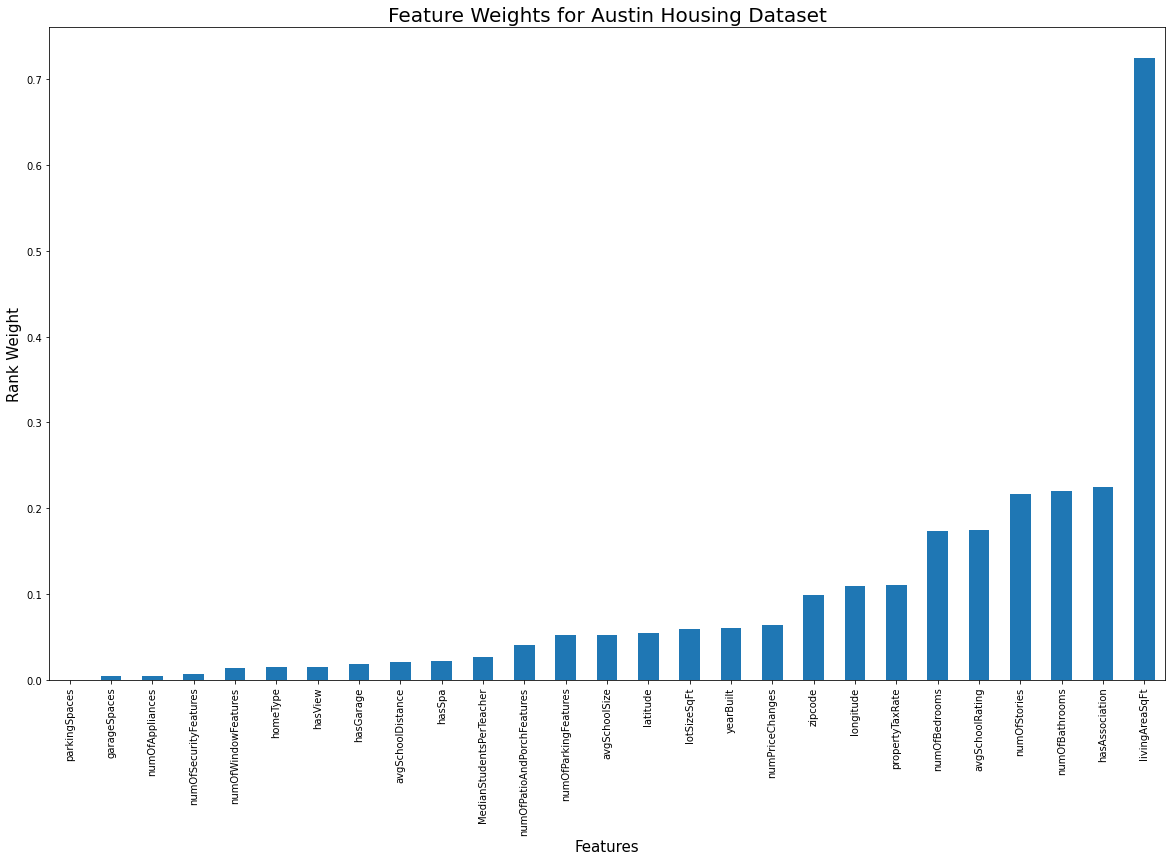

In [6]:
dataset_path_austin = os.path.join('../datasets/austin_housing/')
file_name_austin = 'processed_austin_housing.csv'
df_austin = pd.read_csv(dataset_path_austin + file_name_austin)

X_austin = df_austin.drop(['latestPrice'], axis = 1)
y_austin = df_austin['latestPrice']

from sklearn.linear_model import ElasticNetCV, ElasticNet

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        precompute='auto', max_iter=2500, tol=0.0001, cv=5, copy_X=True, verbose=0, n_jobs=-1, positive=False, 
                        random_state=42, selection='cyclic')

cv_model.fit(X_austin, y_austin)

model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, random_state=42)
model.fit(X_austin, y_austin)

feature_importance_austin = pd.Series(index = X_austin.columns, data = np.abs(model.coef_))

n_selected_features = (feature_importance_austin>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance_austin))*100))

feature_importance_austin.sort_values().tail(30).plot(kind = 'bar', figsize = (20,12))
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Rank Weight', fontsize = 15)
plt.title('Feature Weights for Austin Housing Dataset', fontsize = 20)

In [7]:
elastic_net_austin = feature_importance_austin.to_frame()
elastic_net_austin['method'] = 'elastic_net'
elastic_net_austin['dataset'] = 'austin_housing'


elastic_net_austin = elastic_net_austin.reset_index(level = 0)
elastic_net_austin.rename(columns = {0: 'feature_rank', 'index': 'feature_name'}, inplace = True)

#To rank them instead of showing the coefficients
elastic_net_austin['feature_rank'] = elastic_net_austin['feature_rank'].rank(method='min', ascending=False)
elastic_net_austin

,feature_name,feature_rank,method,dataset
0,zipcode,9.00,elastic_net,austin_housing
1,latitude,13.00,elastic_net,austin_housing
2,longitude,8.00,elastic_net,austin_housing
3,propertyTaxRate,7.00,elastic_net,austin_housing
4,garageSpaces,26.00,elastic_net,austin_housing
5,hasAssociation,2.00,elastic_net,austin_housing
6,hasGarage,20.00,elastic_net,austin_housing
7,hasSpa,18.00,elastic_net,austin_housing
8,hasView,21.00,elastic_net,austin_housing
9,homeType,22.00,elastic_net,austin_housing


In [8]:
#elastic_net_austin.to_csv('../data/featureranks_austin_elastic.csv', sep=';',index=False)
elastic_net_austin.to_csv('../data/elastic_net/featureranks_austin.csv', sep=';',index=False)

# Cars Dataset
Target variable is MSRP

26 features, reduction of 23.53%


Text(0.5, 1.0, 'Feature Weights for Cars Dataset')

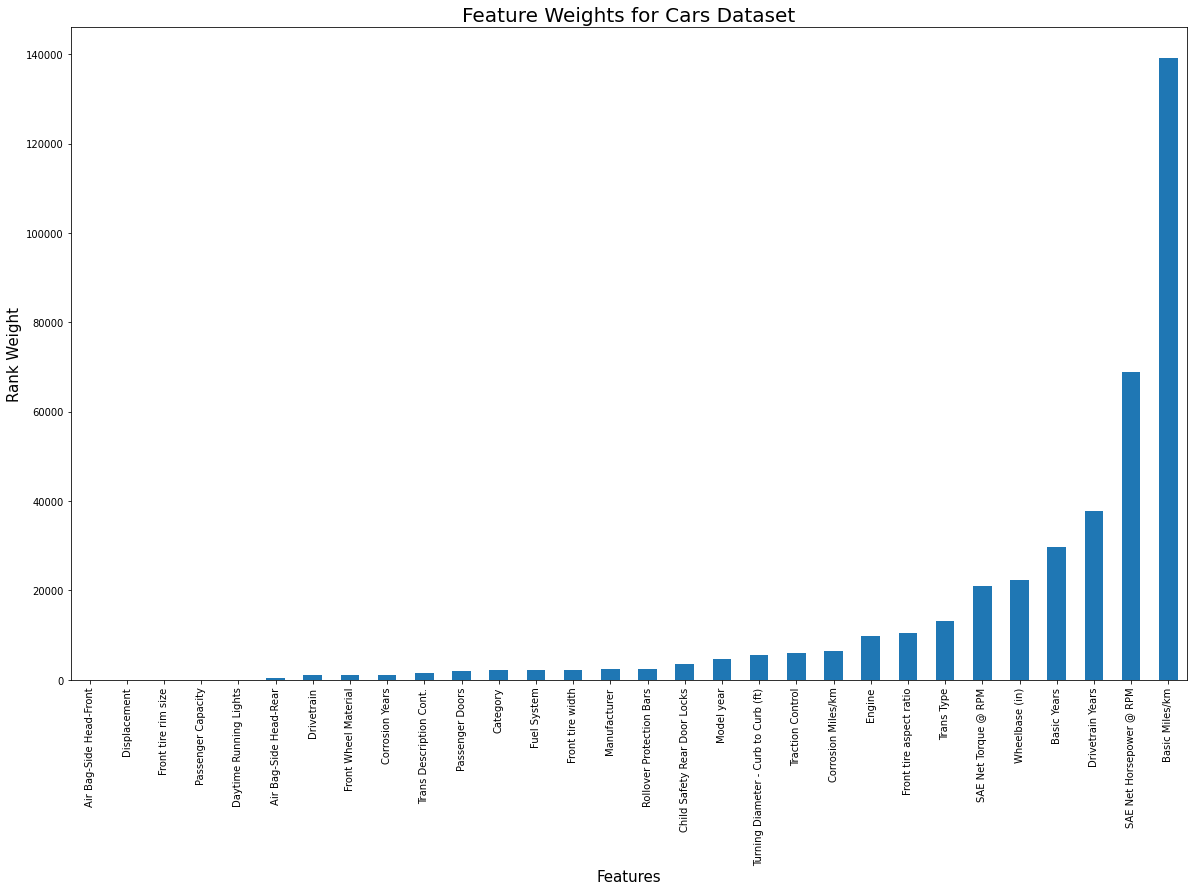

In [9]:
dataset_path_cars = os.path.join('../datasets/cars/')
file_name_cars = 'New_cars_preprocessed.csv'
df_cars = pd.read_csv(dataset_path_cars + file_name_cars)
# df_cars = df_cars.drop(columns = ['Unnamed: 0'])

X_cars = df_cars.drop(['MSRP'], axis = 1)
y_cars = df_cars['MSRP']

from sklearn.linear_model import ElasticNetCV, ElasticNet

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        precompute='auto', max_iter=2500, tol=0.0001, cv=5, copy_X=True, verbose=0, n_jobs=-1, positive=False, 
                        random_state=42, selection='cyclic')

cv_model.fit(X_cars, y_cars)

model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, random_state=42)
model.fit(X_cars, y_cars)

feature_importance_cars = pd.Series(index = X_cars.columns, data = np.abs(model.coef_))

n_selected_features = (feature_importance_cars>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance_cars))*100))

feature_importance_cars.sort_values().tail(30).plot(kind = 'bar', figsize = (20,12))
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Rank Weight', fontsize = 15)
plt.title('Feature Weights for Cars Dataset', fontsize = 20)


In [10]:
df_cars.head()

,EPA Fuel Economy Est - City (MPG),Engine,Drivetrain,Passenger Capacity,Passenger Doors,Wheelbase (in),SAE Net Torque @ RPM,Fuel System,SAE Net Horsepower @ RPM,Displacement,...,Turning Diameter - Curb to Curb (ft),Front Wheel Material,Roadside Assistance Miles/km,Manufacturer,Model year,Category,Front tire width,Front tire aspect ratio,Front tire rim size,MSRP
0,0.33,0.77,0.50,0.33,1.00,0.61,0.30,0.00,0.34,0.27,...,0.42,0.25,0.33,0.00,1.00,0.50,0.28,0.65,0.86,40600.00
1,0.33,0.77,0.50,0.33,1.00,0.61,0.30,0.00,0.34,0.27,...,0.42,0.25,0.33,0.00,1.00,0.50,0.28,0.65,0.86,45500.00
2,0.33,0.77,0.50,0.33,1.00,0.61,0.30,0.00,0.34,0.27,...,0.42,0.25,0.33,0.00,1.00,0.50,0.35,0.53,0.91,43600.00
3,0.33,0.77,0.50,0.33,1.00,0.61,0.30,0.00,0.34,0.27,...,0.42,0.25,0.33,0.00,1.00,0.50,0.28,0.65,0.86,37400.00
4,0.32,0.77,0.25,0.33,1.00,0.61,0.30,0.00,0.34,0.27,...,0.42,0.25,0.33,0.00,1.00,0.50,0.28,0.65,0.86,42600.00


In [11]:
elastic_net_cars = feature_importance_cars.to_frame()
elastic_net_cars['method'] = 'elastic_net'
elastic_net_cars['dataset'] = 'cars'


elastic_net_cars = elastic_net_cars.reset_index(level = 0)
elastic_net_cars.rename(columns = {0: 'feature_rank', 'index': 'feature_name'}, inplace = True)

#To rank them instead of showing the coefficients
elastic_net_cars['feature_rank'] = elastic_net_cars['feature_rank'].rank(method='min', ascending=False)
elastic_net_cars

,feature_name,feature_rank,method,dataset
0,EPA Fuel Economy Est - City (MPG),27.00,elastic_net,cars
1,Engine,9.00,elastic_net,cars
2,Drivetrain,24.00,elastic_net,cars
3,Passenger Capacity,27.00,elastic_net,cars
4,Passenger Doors,20.00,elastic_net,cars
5,Wheelbase (in),5.00,elastic_net,cars
6,SAE Net Torque @ RPM,6.00,elastic_net,cars
7,Fuel System,18.00,elastic_net,cars
8,SAE Net Horsepower @ RPM,2.00,elastic_net,cars
9,Displacement,27.00,elastic_net,cars


In [12]:
elastic_net_cars.to_csv('../data/elastic_net/featureranks_cars.csv', sep=';',index=False)

# Airbnb Dataset
Targe Variable is log_price

13 features, reduction of 27.78%


Text(0.5, 1.0, 'Feature Weights for Airbnb Dataset')

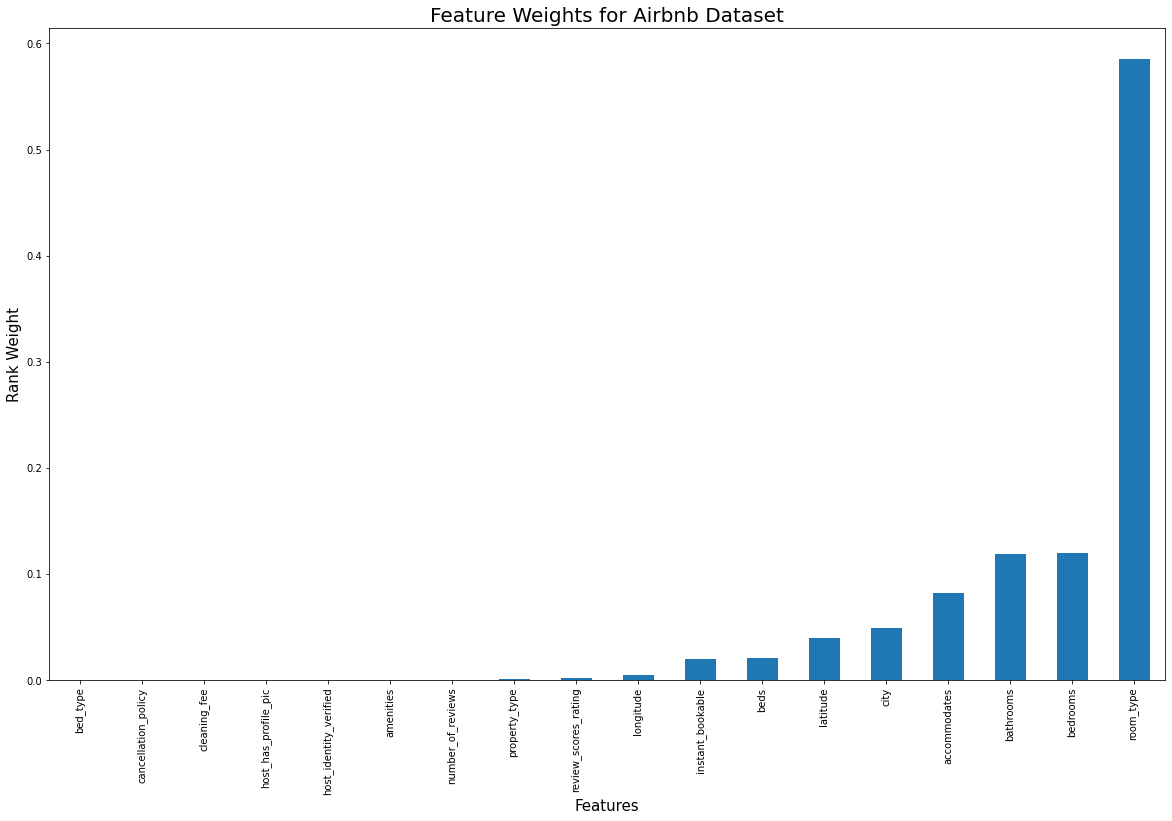

In [13]:
dataset_path_airbnb = os.path.join('../datasets/Airbnb_price/')
file_name_airbnb = 'data_Airbnb_preprocessed.csv'
df_airbnb = pd.read_csv(dataset_path_airbnb + file_name_airbnb)

X_airbnb = df_airbnb.drop(['log_price'], axis = 1)
y_airbnb = df_airbnb['log_price']

from sklearn.linear_model import ElasticNetCV, ElasticNet

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        precompute='auto', max_iter=2500, tol=0.0001, cv=5, copy_X=True, verbose=0, n_jobs=-1, positive=False, 
                        random_state=42, selection='cyclic')

cv_model.fit(X_airbnb, y_airbnb)

model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, random_state=42)
model.fit(X_airbnb, y_airbnb)

feature_importance_airbnb = pd.Series(index = X_airbnb.columns, data = np.abs(model.coef_))

n_selected_features = (feature_importance_airbnb>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance_airbnb))*100))

feature_importance_airbnb.sort_values().tail(30).plot(kind = 'bar', figsize = (20,12))
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Rank Weight', fontsize = 15)
plt.title('Feature Weights for Airbnb Dataset', fontsize = 20)


In [14]:
elastic_net_airbnb = feature_importance_airbnb.to_frame()
elastic_net_airbnb['method'] = 'elastic_net'
elastic_net_airbnb['dataset'] = 'Airbnb_price'


elastic_net_airbnb = elastic_net_airbnb.reset_index(level = 0)
elastic_net_airbnb.rename(columns = {0: 'feature_rank', 'index': 'feature_name'}, inplace = True)

#To rank them instead of showing the coefficients
elastic_net_airbnb['feature_rank'] = elastic_net_airbnb['feature_rank'].rank(method='min', ascending=False)
elastic_net_airbnb

,feature_name,feature_rank,method,dataset
0,property_type,11.00,elastic_net,Airbnb_price
1,room_type,1.00,elastic_net,Airbnb_price
2,amenities,13.00,elastic_net,Airbnb_price
3,accommodates,4.00,elastic_net,Airbnb_price
4,bathrooms,3.00,elastic_net,Airbnb_price
5,bed_type,14.00,elastic_net,Airbnb_price
6,cancellation_policy,14.00,elastic_net,Airbnb_price
7,cleaning_fee,14.00,elastic_net,Airbnb_price
8,city,5.00,elastic_net,Airbnb_price
9,host_has_profile_pic,14.00,elastic_net,Airbnb_price


In [15]:
elastic_net_airbnb.to_csv('../data/elastic_net/featureranks_airbnb.csv', sep=';',index=False)

# Bike Sharing

12 features, reduction of 0.00%


Text(0.5, 1.0, 'Feature Weights for Bike Dataset')

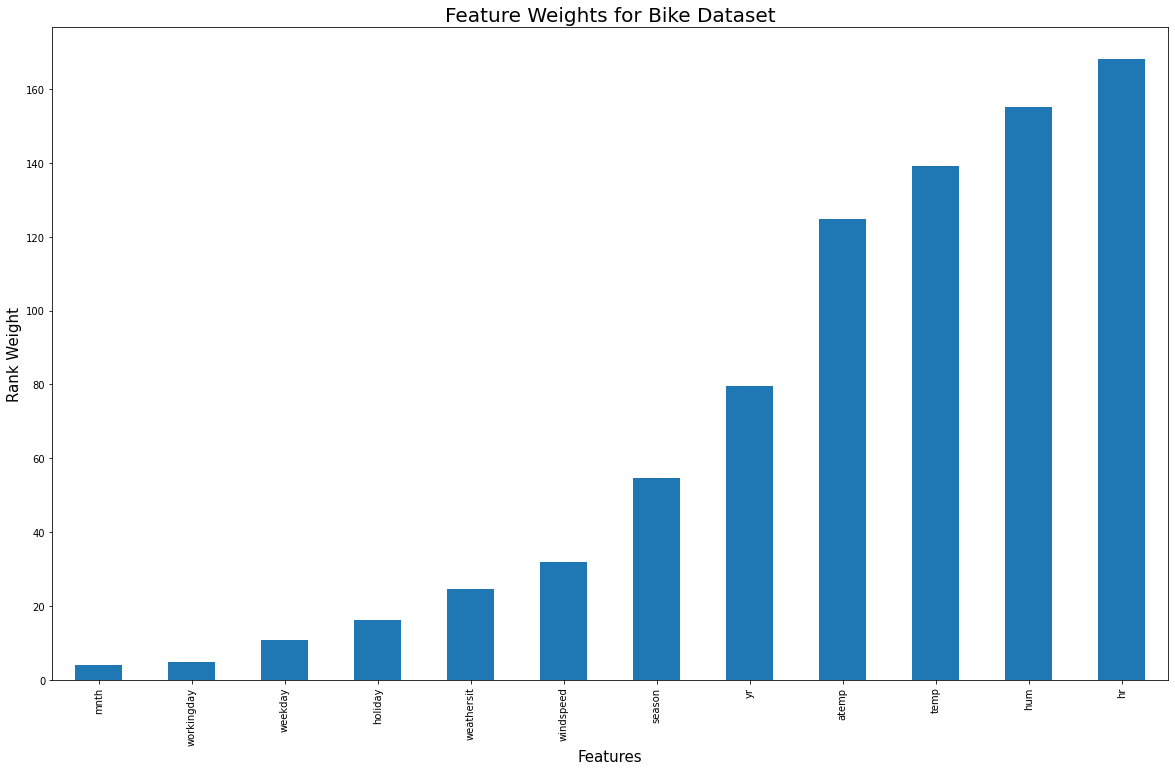

In [16]:
dataset_path_bike = os.path.join('../datasets/Bike Sharing/')
file_name_bike = 'preprocessed_hour.csv'
df_bike = pd.read_csv(dataset_path_bike + file_name_bike)

X_bike = df_bike.drop(['cnt'], axis = 1)
y_bike = df_bike['cnt']

from sklearn.linear_model import ElasticNetCV, ElasticNet

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        precompute='auto', max_iter=2500, tol=0.0001, cv=5, copy_X=True, verbose=0, n_jobs=-1, positive=False, 
                        random_state=42, selection='cyclic')

cv_model.fit(X_bike, y_bike)

model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, random_state=42)
model.fit(X_bike, y_bike)

feature_importance_bike = pd.Series(index = X_bike.columns, data = np.abs(model.coef_))

n_selected_features = (feature_importance_bike>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance_bike))*100))

feature_importance_bike.sort_values().tail(30).plot(kind = 'bar', figsize = (20,12))
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Rank Weight', fontsize = 15)
plt.title('Feature Weights for Bike Dataset', fontsize = 20)

In [17]:
elastic_net_bike = feature_importance_bike.to_frame()
elastic_net_bike['method'] = 'elastic_net'
elastic_net_bike['dataset'] = 'Bike_sharing'


elastic_net_bike = elastic_net_bike.reset_index(level = 0)
elastic_net_bike.rename(columns = {0: 'feature_rank', 'index': 'feature_name'}, inplace = True)

#To rank them instead of showing the coefficients
elastic_net_bike['feature_rank'] = elastic_net_bike['feature_rank'].rank(method='min', ascending=False)
elastic_net_bike

,feature_name,feature_rank,method,dataset
0,season,6.00,elastic_net,Bike_sharing
1,yr,5.00,elastic_net,Bike_sharing
2,mnth,12.00,elastic_net,Bike_sharing
3,hr,1.00,elastic_net,Bike_sharing
4,holiday,9.00,elastic_net,Bike_sharing
5,weekday,10.00,elastic_net,Bike_sharing
6,workingday,11.00,elastic_net,Bike_sharing
7,weathersit,8.00,elastic_net,Bike_sharing
8,temp,3.00,elastic_net,Bike_sharing
9,atemp,4.00,elastic_net,Bike_sharing


In [18]:
elastic_net_bike.to_csv('../data/elastic_net/featureranks_bike.csv', sep=';',index=False)

In [19]:
frames = [elastic_net_USA, elastic_net_austin, elastic_net_airbnb, elastic_net_cars, elastic_net_bike]

all_df = pd.concat(frames)
all_df

,feature_name,feature_rank,method,dataset
0,bedrooms,3.00,elastic_net,USA_housing
1,bathrooms,9.00,elastic_net,USA_housing
2,sqft_living,1.00,elastic_net,USA_housing
3,sqft_lot,2.00,elastic_net,USA_housing
4,floors,11.00,elastic_net,USA_housing
...,...,...,...,...
7,weathersit,8.00,elastic_net,Bike_sharing
8,temp,3.00,elastic_net,Bike_sharing
9,atemp,4.00,elastic_net,Bike_sharing
10,hum,2.00,elastic_net,Bike_sharing


In [20]:
all_df.to_csv('../data/featureranks_elastic.csv', sep=';',index=False)